In [2]:
import os
from posixpath import join
import paramiko
from scp import SCPClient
import shutil

run_id = 1
jar_name = 'letter-frequency-1.0-SNAPSHOT.jar'
# connect with ssh


First analyze the letter frequencies in books across the eras. As performance is not relevant now, the job will be executed with 1 reducer, using combiner.
We hypotize that the input files are already in the input folder in hdfs, in /user/hadoop/letter_analysis/input/.

In [3]:
""" ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect('10.1.1.124', username='hadoop', password='ubuntu')
root_dir = '/user/hadoop/historical_analysis'

# run the job for each file
for txt_file in os.listdir('../resources/historical_analysis/input'):
    print(f'Processing {txt_file}')
    input_dir = join(root_dir, 'input', txt_file)
    output_dir = join(root_dir, f'output_{run_id}', txt_file.split('.')[0])
    stdin, stdout, stderr = ssh.exec_command(f'/opt/hadoop/bin/hadoop jar {jar_name} it.unipi.cloud.MapReduceApp '
                                             f'{input_dir} {output_dir}/count {output_dir}/freq 1 inmappercombiner')
    print(stderr.read().decode('utf-8'))
    print(stdout.read().decode('utf-8'))

# copy the output to local
stdin, stdout, stderr = ssh.exec_command(f'/opt/hadoop/bin/hadoop fs -copyToLocal /user/hadoop/historical_analysis/output_{run_id} .')
print(stderr.read().decode('utf-8'))

if not os.path.exists(f'../resources/historical_analysis/output_{run_id}'):
    os.mkdir(f'../resources/historical_analysis/output_{run_id}')
    
scp = SCPClient(ssh.get_transport())
scp.get(f'output_{run_id}', '../resources/historical_analysis/', recursive=True)

# remove the output
ssh.exec_command(f'rm -r output_{run_id}')
scp.close()
ssh.close() """

" ssh = paramiko.SSHClient()\nssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())\nssh.connect('10.1.1.124', username='hadoop', password='ubuntu')\nroot_dir = '/user/hadoop/historical_analysis'\n\n# run the job for each file\nfor txt_file in os.listdir('../resources/historical_analysis/input'):\n    print(f'Processing {txt_file}')\n    input_dir = join(root_dir, 'input', txt_file)\n    output_dir = join(root_dir, f'output_{run_id}', txt_file.split('.')[0])\n    stdin, stdout, stderr = ssh.exec_command(f'/opt/hadoop/bin/hadoop jar {jar_name} it.unipi.cloud.MapReduceApp '\n                                             f'{input_dir} {output_dir}/count {output_dir}/freq 1 inmappercombiner')\n    print(stderr.read().decode('utf-8'))\n    print(stdout.read().decode('utf-8'))\n\n# copy the output to local\nstdin, stdout, stderr = ssh.exec_command(f'/opt/hadoop/bin/hadoop fs -copyToLocal /user/hadoop/historical_analysis/output_{run_id} .')\nprint(stderr.read().decode('utf-8'))\n\nif not o

After that we can analyze the output files.

../resources/historical_analysis/output_0
             a         b         c         d         e         f         g  \
1294  0.111057  0.006691  0.042903  0.043161  0.130910  0.007840  0.016282   
1321  0.107435  0.007410  0.051659  0.037205  0.120249  0.012763  0.018223   
1350  0.104108  0.006215  0.043551  0.038871  0.134355  0.009838  0.016675   
1483  0.130420  0.010505  0.045051  0.036890  0.119230  0.013003  0.021084   
1516  0.115783  0.009256  0.047854  0.037156  0.117086  0.013442  0.022996   
1518  0.108213  0.009105  0.051026  0.033731  0.123542  0.012682  0.017431   
1620  0.108867  0.009621  0.041098  0.039288  0.120334  0.013744  0.025107   
1769  0.094251  0.007932  0.047601  0.035772  0.112259  0.013973  0.021577   
1788  0.115295  0.008470  0.033842  0.038579  0.106704  0.013609  0.027358   
1827  0.114707  0.009738  0.046425  0.037303  0.120642  0.010520  0.017327   
1832  0.112681  0.009165  0.045616  0.038201  0.121263  0.010446  0.018957   
1835  0.109532  0.0085

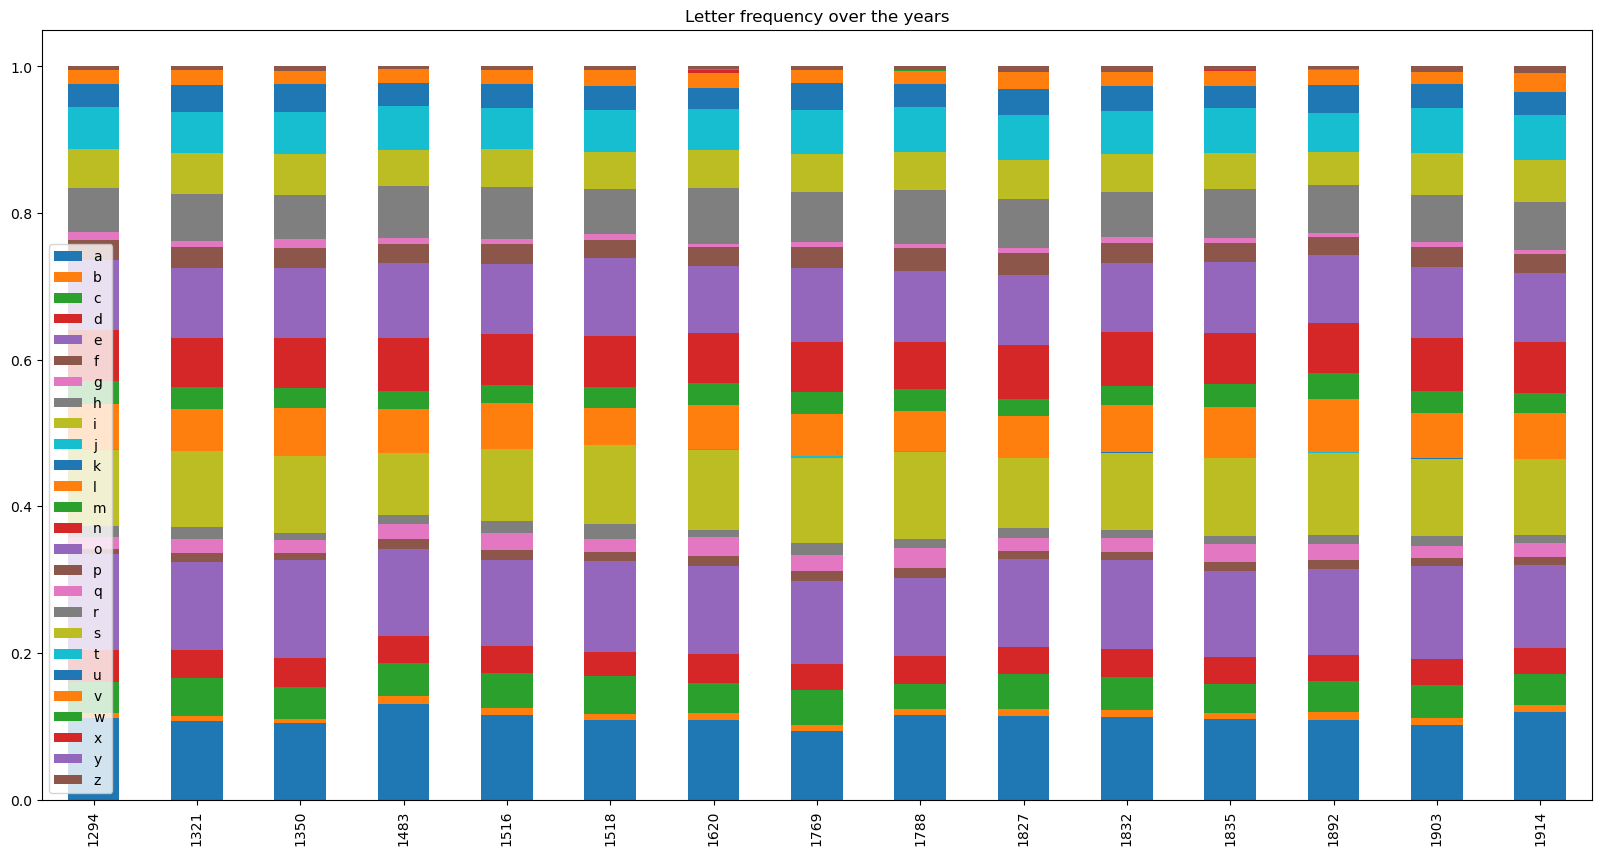

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

run_id = 0

directory = f'../resources/historical_analysis/output_{run_id}'
print(directory)

years = []
for filename in os.listdir(directory):
    year = filename.split('.')[0]
    years.append(year)

df = pd.DataFrame(index=years, columns=[])

for year in years:
    freq_per_year = []
    filepath = f'{directory}/{year}/freq/part-r-00000'
    with open(filepath, 'r') as f:
        for line in f:
            letter, freq = line.strip().split('\t')
            freq = float(freq)
            df.loc[year, letter] = freq
print(df)

df.plot( kind='bar', stacked=True, title='Letter frequency over the years', figsize=(20, 10))

performance analysis

In [5]:
""" import string
import random
# Dimensioni dei file in bytes
sizes = [10 * 1024, 1 * 1024 * 1024, 100 * 1024 * 1024, 1 * 1024 * 1024 * 1024]
chunk_size = 100  # Dimensione del chunk in bytes

# Nomi dei file
file_dir = "../resources/performance_analysis/input"
filenames = [os.path.join(file_dir, "file_10KB.txt"), 
             os.path.join(file_dir, "file_1MB.txt"), 
             os.path.join(file_dir, "file_100MB.txt"), 
             os.path.join(file_dir, "file_1GB.txt")]

# Genera una stringa di lettere casuali
def generate_random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

for size, filename in zip(sizes, filenames):
    print(f"Generating {filename}...")
    with open(filename, 'w') as f:
        for _ in range(size // chunk_size):
            f.write(generate_random_string(chunk_size))
            f.write('\n')
        remaining = size % chunk_size
        if remaining:
            f.write(generate_random_string(remaining))
    print(f"File {filename} generated successfully.") """

' import string\nimport random\n# Dimensioni dei file in bytes\nsizes = [10 * 1024, 1 * 1024 * 1024, 100 * 1024 * 1024, 1 * 1024 * 1024 * 1024]\nchunk_size = 100  # Dimensione del chunk in bytes\n\n# Nomi dei file\nfile_dir = "../resources/performance_analysis/input"\nfilenames = [os.path.join(file_dir, "file_10KB.txt"), \n             os.path.join(file_dir, "file_1MB.txt"), \n             os.path.join(file_dir, "file_100MB.txt"), \n             os.path.join(file_dir, "file_1GB.txt")]\n\n# Genera una stringa di lettere casuali\ndef generate_random_string(length):\n    letters = string.ascii_letters\n    return \'\'.join(random.choice(letters) for i in range(length))\n\nfor size, filename in zip(sizes, filenames):\n    print(f"Generating {filename}...")\n    with open(filename, \'w\') as f:\n        for _ in range(size // chunk_size):\n            f.write(generate_random_string(chunk_size))\n            f.write(\'\n\')\n        remaining = size % chunk_size\n        if remaining:\n     

In [3]:
ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh.connect('10.1.1.124', username='hadoop', password='ubuntu')
root_dir = '/user/hadoop/performance_analysis'
methods = ['combiner', 'inmappercombiner']
n_reducers = 3
run_id = 2


# try all the combinations of methods and reducers
for method in methods:
    for i in range(1, n_reducers+1):
        for txt_file in os.listdir('../resources/performance_analysis/input'):
            print(f'Processing {txt_file} with {method} and {i} reducers')
            input_dir = join(root_dir, 'input', txt_file)
            output_dir = join(root_dir, f'output_{run_id}_{method}_{i}', txt_file.split('.')[0])
            ssh.exec_command(f'mkdir -p output_{run_id}_{method}_{i}/{txt_file.split(".")[0]}')

            stdin, stdout, stderr = ssh.exec_command(f'/opt/hadoop/bin/hadoop jar {jar_name} it.unipi.cloud.MapReduceApp '
                                                     f'{input_dir} {output_dir}/count {output_dir}/freq {i} {method} '
                                                     f'> log.txt 2>&1')
            print(stderr.read().decode('utf-8'))
            
            stdin, stdout, stderr = ssh.exec_command(f'/opt/hadoop/bin/hadoop fs -copyToLocal {output_dir} output_{run_id}_{method}_{i}/{txt_file.split(".")[0]}' )
            print(stderr.read().decode('utf-8'))
            stdin, stdout, stderr = ssh.exec_command(f'mv log.txt output_{run_id}_{method}_{i}/{txt_file.split(".")[0]}/log.txt')
            print(stderr.read().decode('utf-8'))
            
        # create the output directory in project resources
        if not os.path.exists(f'../resources/performance_analysis/output_{run_id}_{method}_{i}'):
            os.mkdir(f'../resources/performance_analysis/output_{run_id}_{method}_{i}')

        # move the output to local machine
        scp = SCPClient(ssh.get_transport())
        scp.get(f'output_{run_id}_{method}_{i}', '../resources/performance_analysis/', recursive=True)
        
        # remove the output directory from virtual machine
        stdin, stdout, stderr = ssh.exec_command(f'rm -r output_{run_id}_{method}_{i}')
        print(stderr.read().decode('utf-8'))

scp.close()
ssh.close()

Processing 100MB.txt with combiner and 1 reducers

2024-06-20 16:01:39,785 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2024-06-20 16:01:39,934 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


Processing 10KB.txt with combiner and 1 reducers

2024-06-20 16:02:26,498 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2024-06-20 16:02:26,627 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


Processing 1GB.txt with combiner and 1 reducers

2024-06-20 16:13:37,596 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2024-06-20 16:13:37,735 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


Processing

     10KB     1MB     100MB        1GB
1  1410.0  3390.0  131080.0  1173670.0
2  2060.0  4260.0  132580.0  1200290.0
3  2560.0  4970.0  140400.0  1202600.0
     10KB     1MB    100MB       1GB
1  1150.0  2220.0  38760.0  365970.0
2  1900.0  2720.0  39360.0  368950.0
3  2340.0  3680.0  41080.0  371650.0
                         10KB          1MB         100MB            1GB
combiner          1323.333333  2683.333333  92410.000000  675493.333333
inmappercombiner  1243.333333  1903.333333  25613.333333  258940.000000


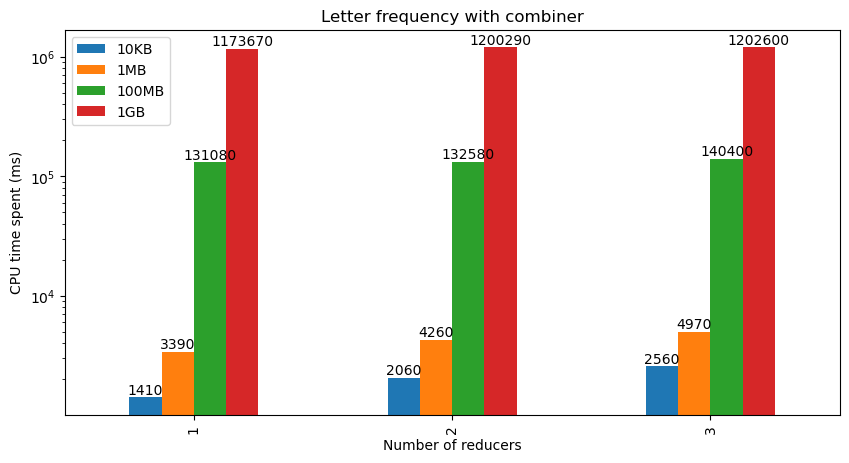

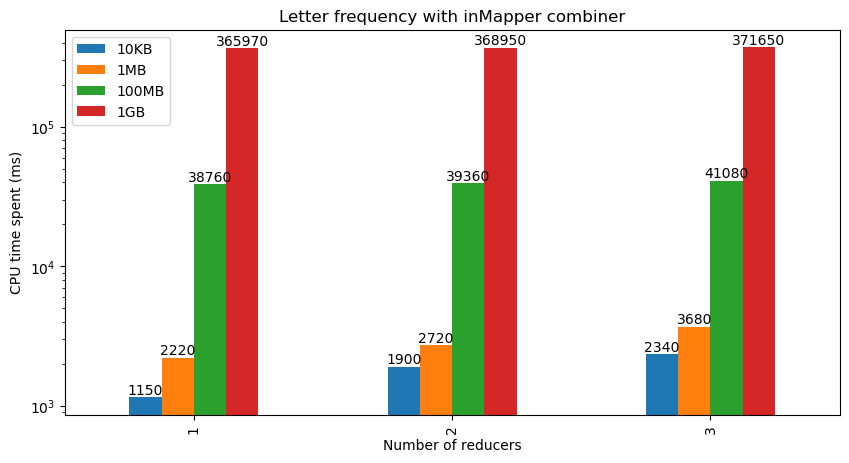

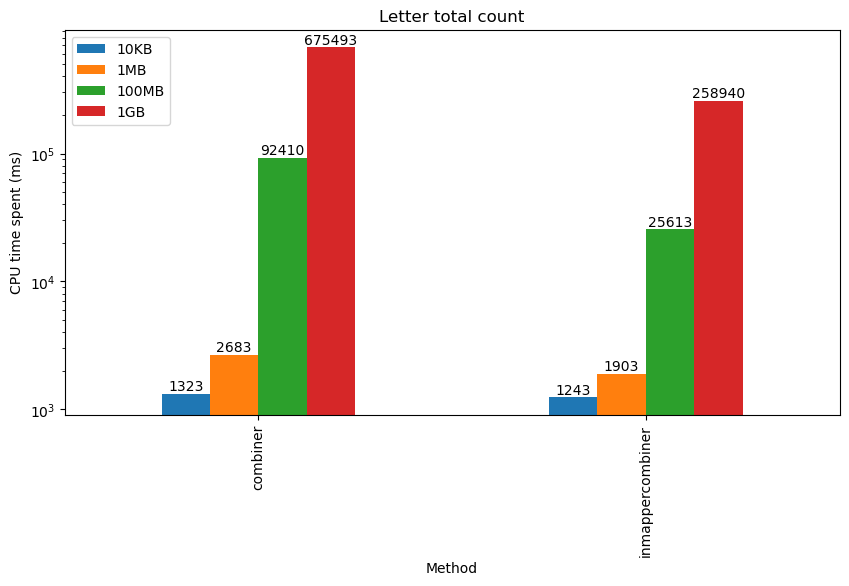

     10KB     1MB     100MB        1GB
1  3281.0  4527.0  112853.0  4450821.0
2  3158.0  4115.0  112970.0  4532211.0
3  2538.0  4117.0  116584.0  4397692.0
     10KB     1MB    100MB        1GB
1  2515.0  3219.0  37947.0  1204863.0
2  2840.0  3390.0  37964.0  1115259.0
3  2797.0  3315.0  39544.0  1363090.0
                         10KB          1MB         100MB           1GB
combiner          2757.000000  3666.666667  68111.333333  2.601410e+06
inmappercombiner  2676.333333  3161.333333  25840.000000  8.597647e+05


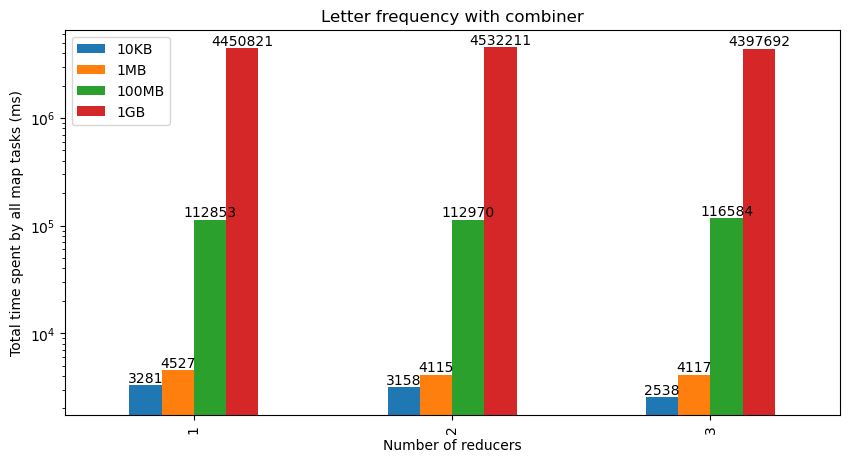

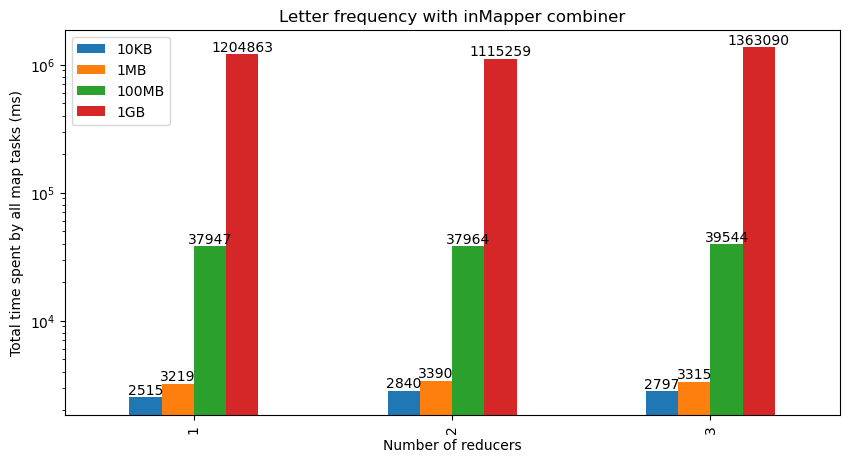

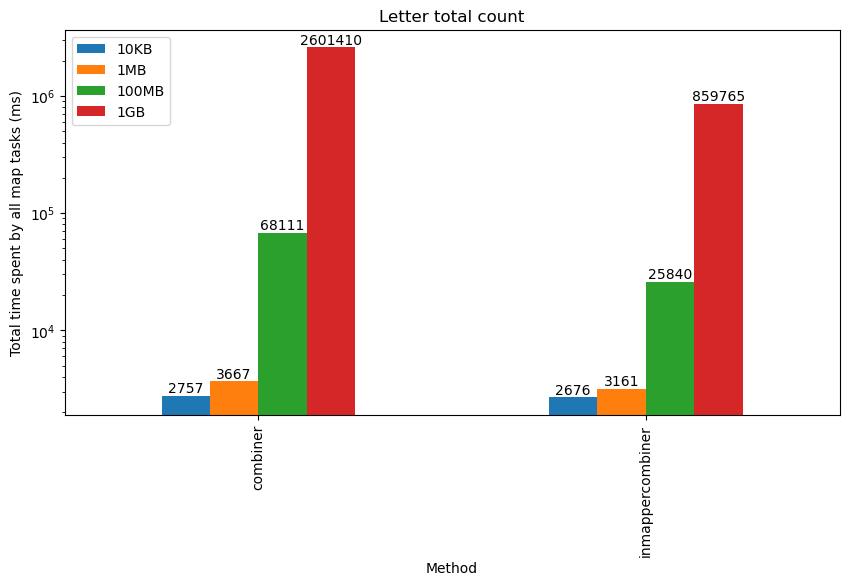

     10KB     1MB   100MB        1GB
1  2991.0  2834.0  2938.0   336950.0
2  5898.0  5987.0  5941.0   761754.0
3  9420.0  8529.0  9753.0  1129705.0
     10KB     1MB   100MB       1GB
1  2477.0  2665.0  2758.0   98368.0
2  5468.0  5293.0  5719.0  177828.0
3  8375.0  8749.0  8804.0  363019.0
                         10KB     1MB        100MB            1GB
combiner          2890.333333  2695.0  2925.666667  205125.333333
inmappercombiner  2775.000000  2803.0  2636.666667   85077.333333


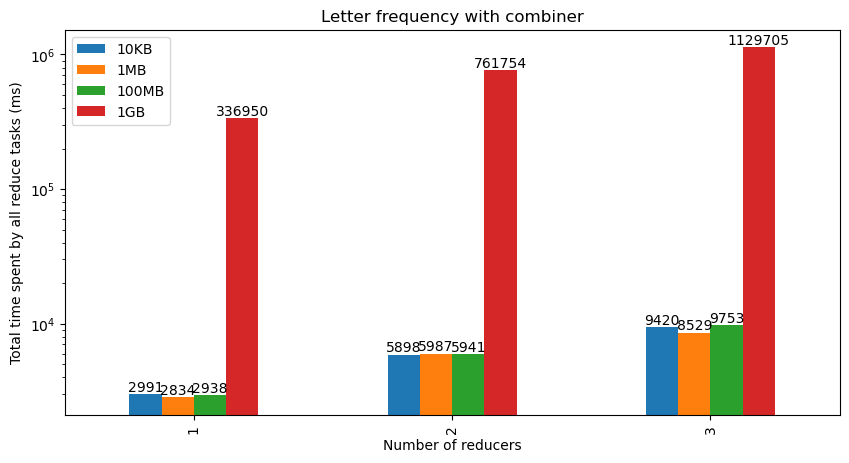

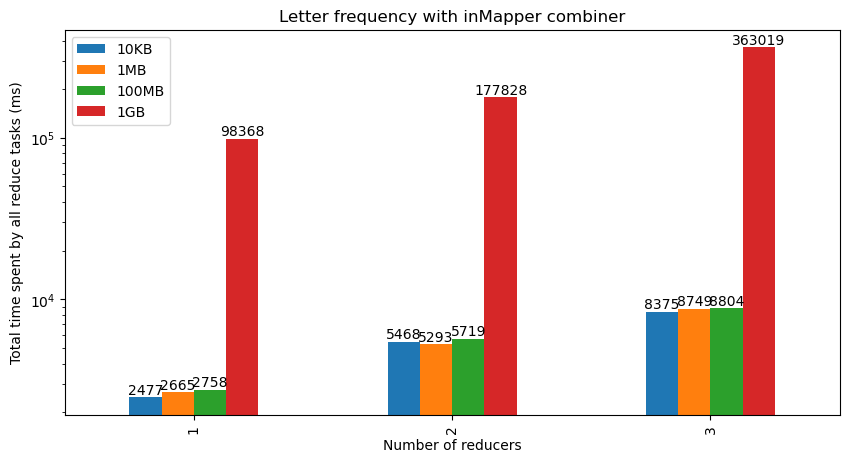

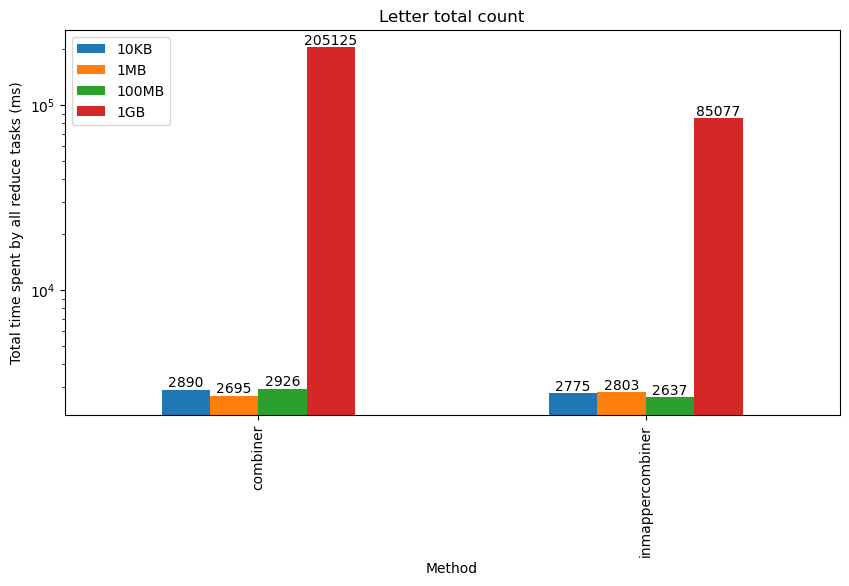

    10KB    1MB   100MB      1GB
1  197.0  200.0  2223.0  17984.0
2  276.0  281.0  2317.0  17054.0
3  344.0  380.0  2909.0  17611.0
    10KB    1MB   100MB      1GB
1  149.0  210.0  3625.0  19480.0
2  237.0  273.0  3641.0  20562.0
3  335.0  359.0  3770.0  21075.0
                        10KB         1MB        100MB           1GB
combiner          178.666667  182.333333  1632.666667  12167.333333
inmappercombiner  165.000000  177.000000  1787.333333  12544.000000


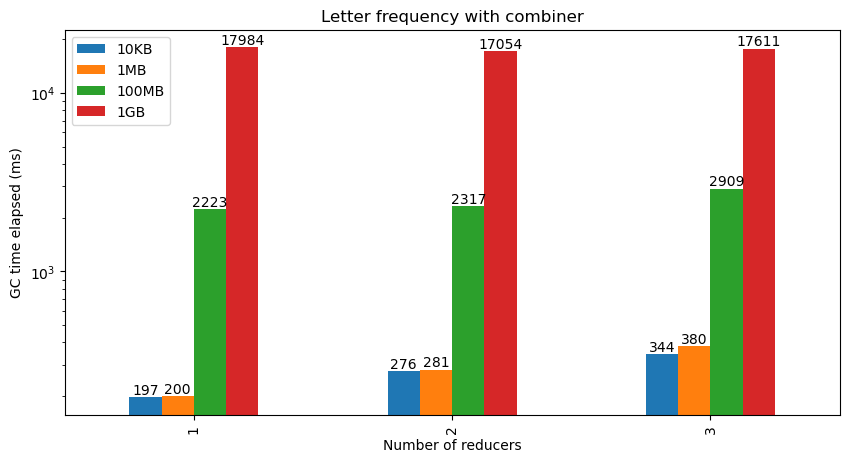

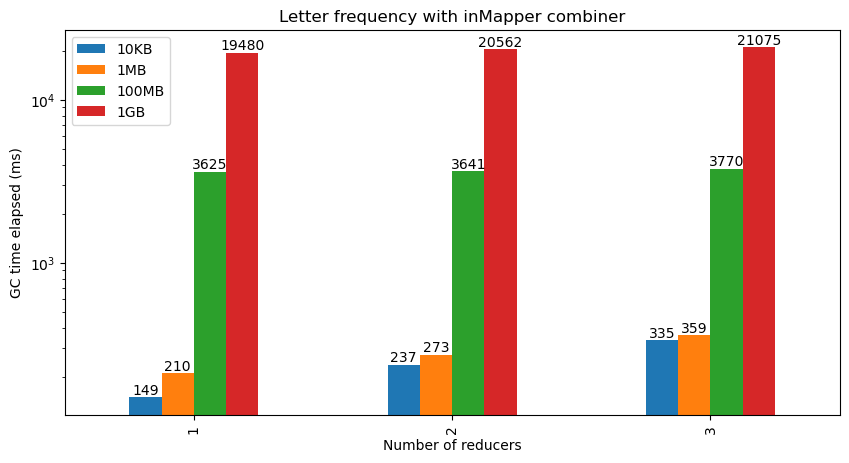

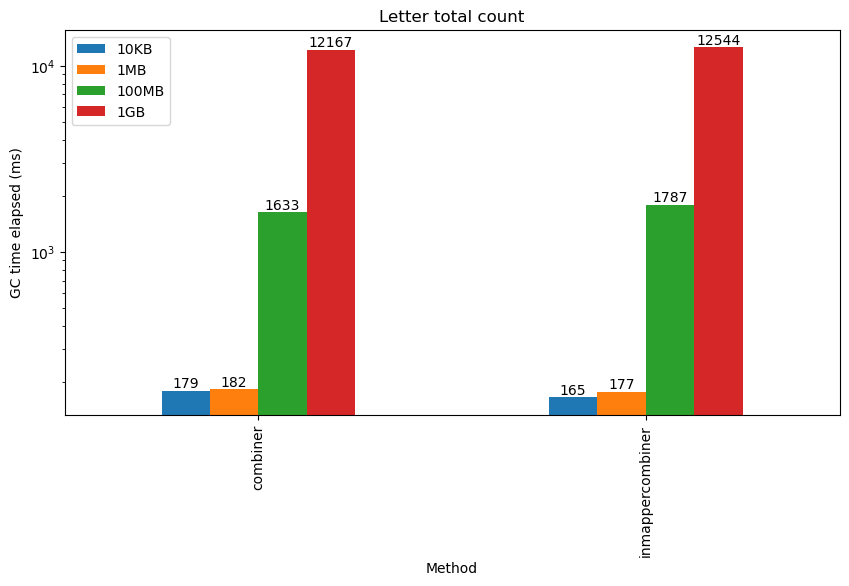

          10KB          1MB        100MB          1GB
1  276561920.0  276447232.0  280588288.0  296697856.0
2  274333696.0  277782528.0  280424448.0  297975808.0
3  274198528.0  276393984.0  281858048.0  297177088.0
          10KB          1MB        100MB          1GB
1  273768448.0  278970368.0  277921792.0  279400448.0
2  272986112.0  276692992.0  278233088.0  280580096.0
3  273182720.0  278237184.0  277712896.0  285057024.0
                          10KB           1MB         100MB           1GB
combiner          2.751993e+08  2.767981e+08  2.797240e+08  2.813911e+08
inmappercombiner  2.744020e+08  2.803029e+08  2.765428e+08  2.815167e+08


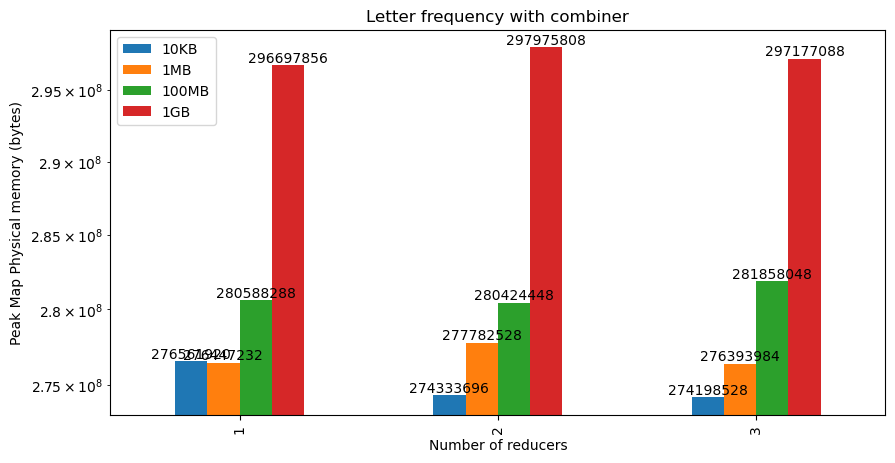

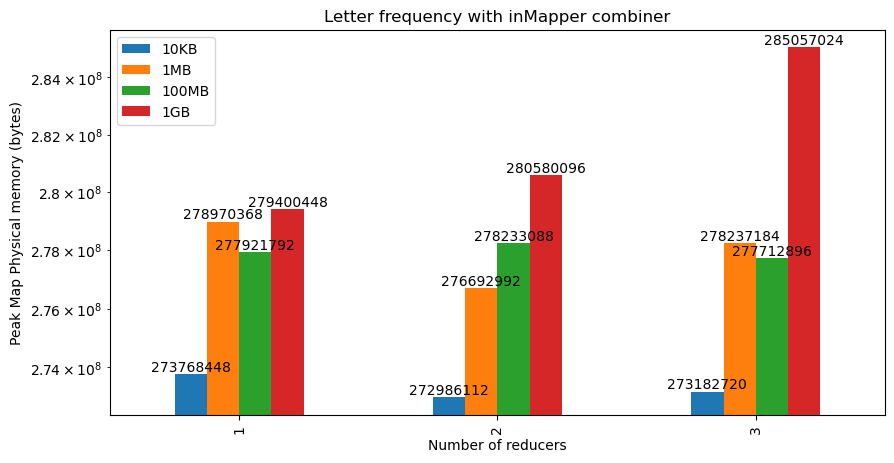

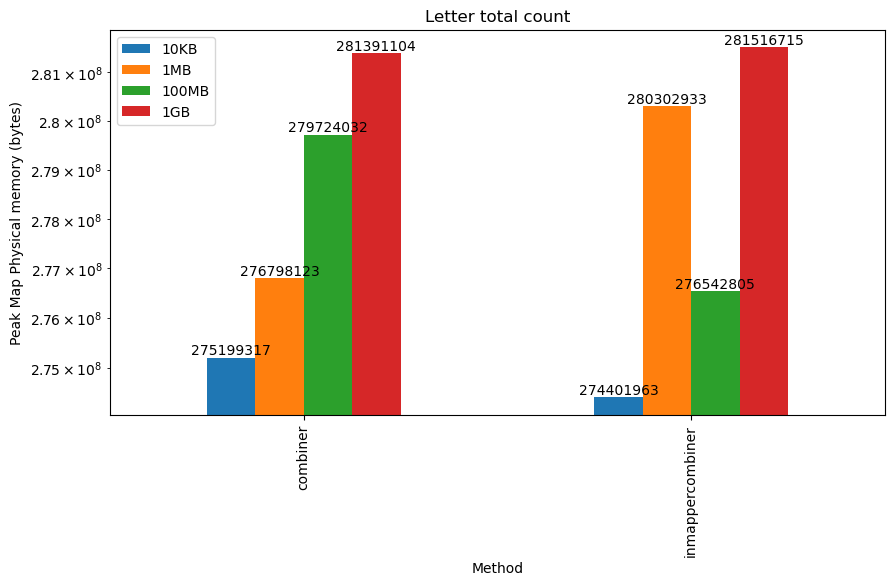

           10KB           1MB         100MB           1GB
1  1865531392.0  1867304960.0  1872064512.0  1889439744.0
2  1867415552.0  1868070912.0  1871208448.0  1889677312.0
3  1863602176.0  1867309056.0  1872515072.0  1889021952.0
           10KB           1MB         100MB           1GB
1  1863041024.0  1866387456.0  1867444224.0  1870454784.0
2  1862336512.0  1865220096.0  1867833344.0  1871712256.0
3  1863630848.0  1867055104.0  1868505088.0  1874944000.0
                          10KB           1MB         100MB           1GB
combiner          1.863549e+09  1.865335e+09  1.871073e+09  1.872605e+09
inmappercombiner  1.863550e+09  1.866767e+09  1.866890e+09  1.871486e+09


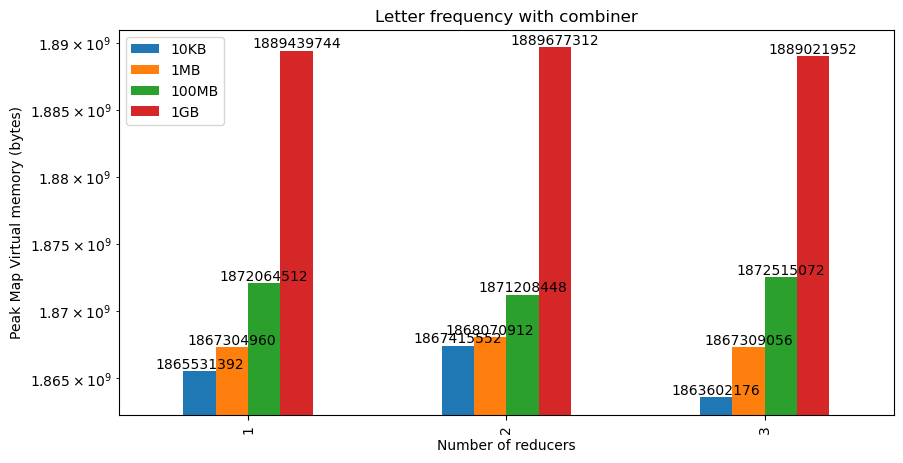

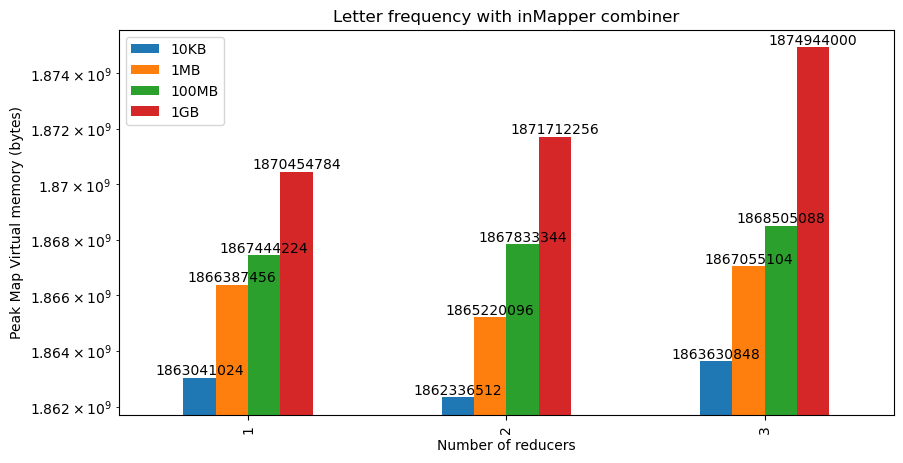

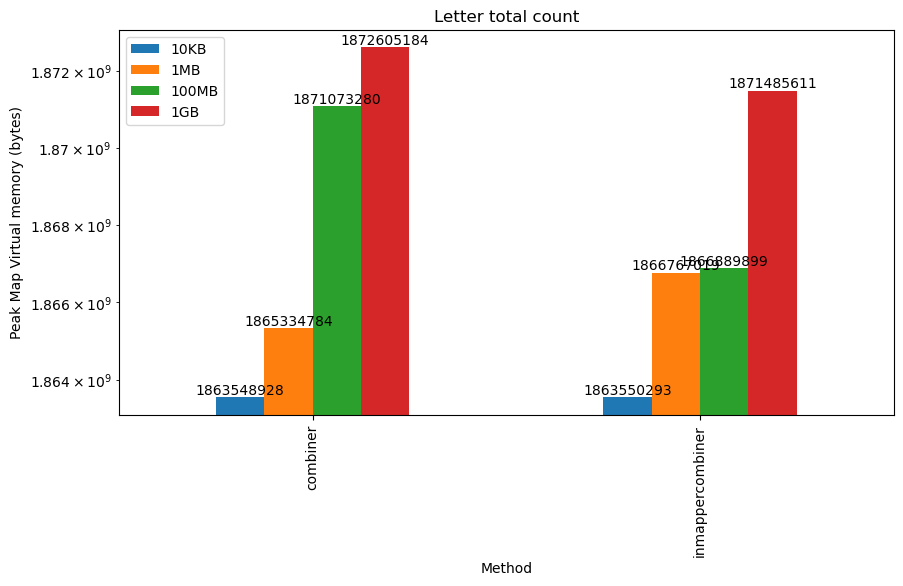

          10KB          1MB        100MB          1GB
1  170840064.0  172716032.0  171290624.0  170262528.0
2  170094592.0  171233280.0  172158976.0  182358016.0
3  174727168.0  171630592.0  171208704.0  187817984.0
          10KB          1MB        100MB          1GB
1  170680320.0  170708992.0  170500096.0  171507712.0
2  170872832.0  170889216.0  171458560.0  171200512.0
3  172945408.0  174080000.0  174329856.0  171712512.0
                          10KB           1MB         100MB           1GB
combiner          1.714422e+08  1.708223e+08  1.717275e+08  1.631491e+08
inmappercombiner  1.719487e+08  1.738779e+08  1.707035e+08  1.644039e+08


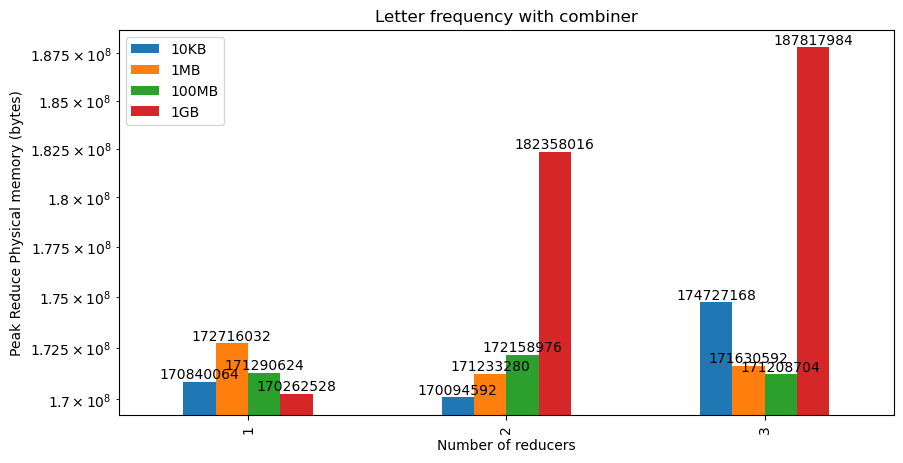

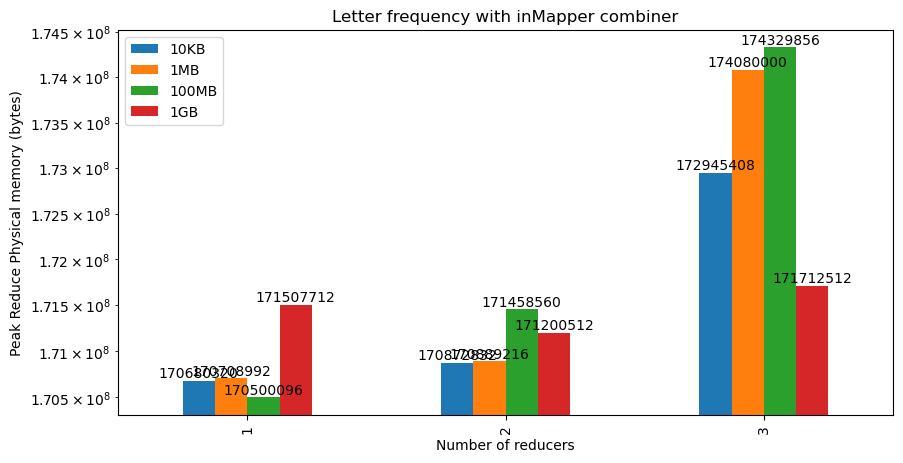

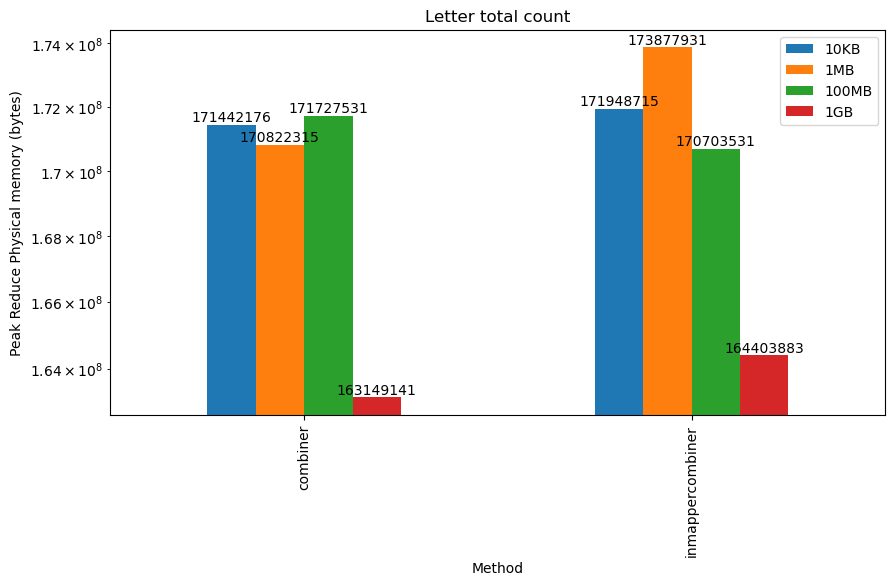

           10KB           1MB         100MB           1GB
1  1871806464.0  1873289216.0  1872908288.0  1873158144.0
2  1875095552.0  1872498688.0  1873793024.0  1885171712.0
3  1874792448.0  1872412672.0  1873162240.0  1888387072.0
           10KB           1MB         100MB           1GB
1  1871798272.0  1872343040.0  1871892480.0  1871532032.0
2  1872760832.0  1872699392.0  1872297984.0  1875025920.0
3  1874120704.0  1873166336.0  1874190336.0  1873289216.0
                          10KB           1MB         100MB           1GB
combiner          1.873364e+09  1.871761e+09  1.873318e+09  1.874190e+09
inmappercombiner  1.873330e+09  1.874784e+09  1.871614e+09  1.872368e+09


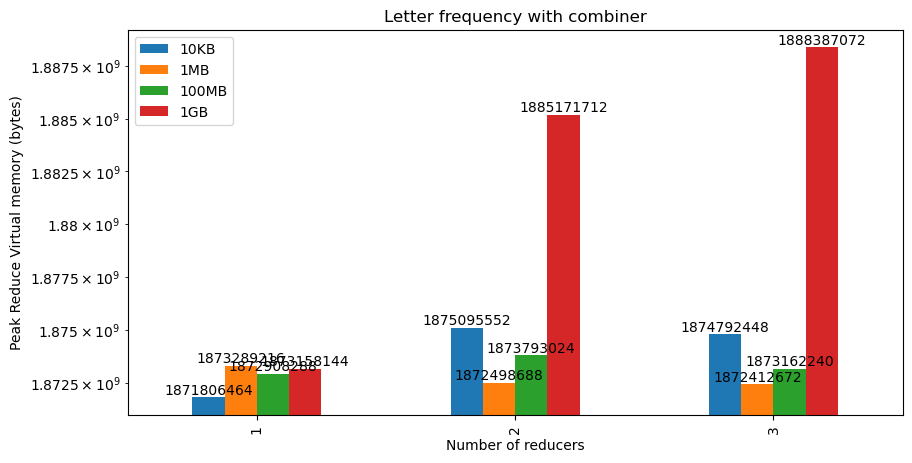

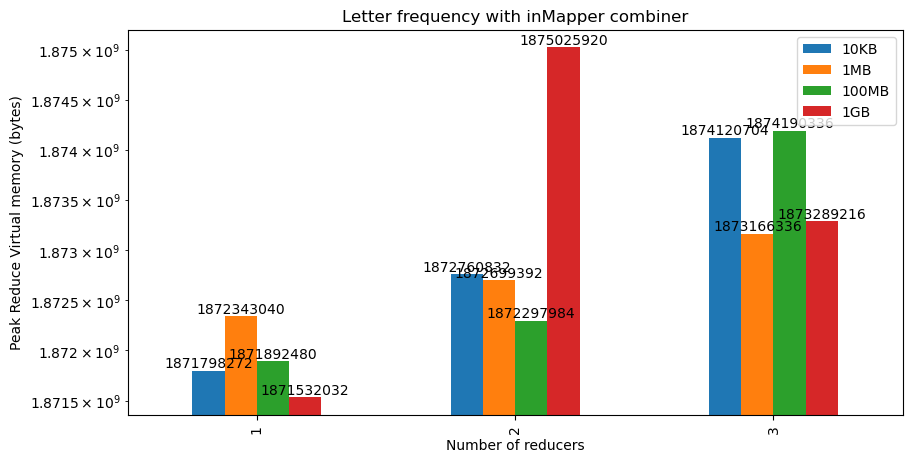

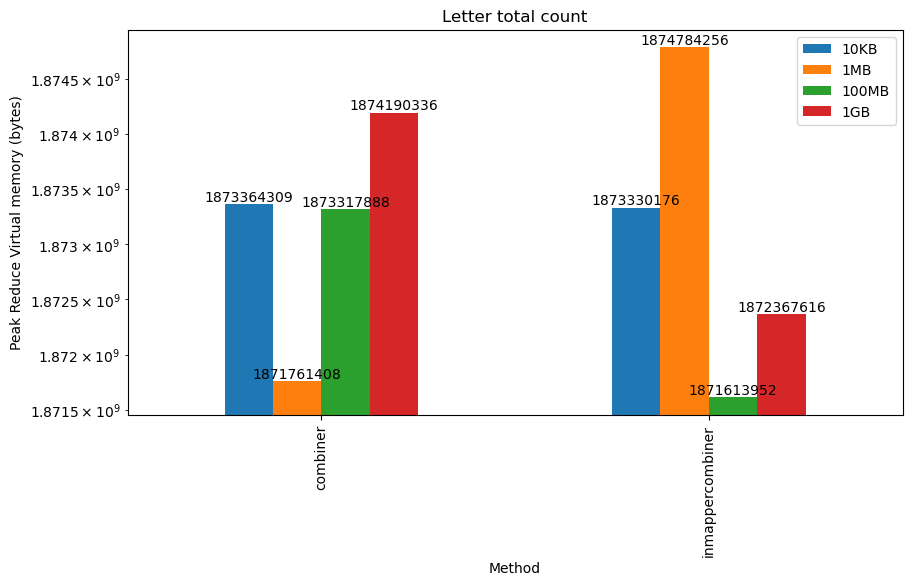

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

run_id = 1

parameters_list = [
    'CPU time spent (ms)', 
    'Total time spent by all map tasks (ms)',
    'Total time spent by all reduce tasks (ms)',
    'GC time elapsed (ms)',
    'Peak Map Physical memory (bytes)',
	'Peak Map Virtual memory (bytes)',
	'Peak Reduce Physical memory (bytes)',
	'Peak Reduce Virtual memory (bytes)'
    ]
methods = ['combiner', 'inmappercombiner']
dim = ['10KB', '1MB', '100MB', '1GB']
n_reducers = 3

for params in parameters_list:
    freq_comb_df = pd.DataFrame(index=range(1, n_reducers+1), columns=dim)
    freq_inmap_df = pd.DataFrame(index=range(1, n_reducers+1), columns=dim)
    count_df = pd.DataFrame(index=methods, columns=dim)
    count_df = count_df.fillna(0)
    for method in methods:
        for i in range(1, n_reducers+1):
            for dim_directory in os.listdir(f'../resources/performance_analysis/output_{run_id}_{method}_{i}'):
                log_file = f'../resources/performance_analysis/output_{run_id}_{method}_{i}/{dim_directory}/log.txt'
                is_total_count = True
                with open(log_file, 'r') as f:
                    for line in f:
                        if params in line:
                            if is_total_count:
                                count_df.loc[method, dim_directory] += float(line.split('=')[1])
                                is_total_count = False
                            else:
                                if method == 'combiner':
                                    freq_comb_df.loc[i, dim_directory] = float(line.split('=')[1])
                                else:
                                    freq_inmap_df.loc[i, dim_directory] = float(line.split('=')[1])
                                is_total_count = True           
    count_df = count_df / n_reducers

    print(freq_comb_df)
    print(freq_inmap_df)
    print(count_df)

    # Plot for freq_comb_df
    ax1 = freq_comb_df.plot(kind='bar', title='Letter frequency with combiner', figsize=(10, 5), xlabel="Number of reducers", ylabel=f'{params}')
    ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    ax1.set_yscale('log')
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    # for p in ax1.patches:
    #     ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    # Plot for freq_inmap_df
    ax2 = freq_inmap_df.plot(kind='bar', title='Letter frequency with inMapper combiner', figsize=(10, 5), xlabel="Number of reducers", ylabel=f'{params}')
    ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax2.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    ax2.set_yscale('log')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    # for p in ax2.patches:
    #     ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    # Plot for count_df
    ax3 = count_df.plot(kind='bar', title='Letter total count', figsize=(10, 5), xlabel="Method", ylabel=f'{params}')
    ax3.set_yscale('log')
    for p in ax3.patches:
        ax3.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    # ax3.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax3.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    # ax3.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    # for p in ax3.patches:
    #     ax3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.show()
